In [1]:
from pylab import *
%matplotlib inline
import random

# 1

Se tiene la ecuación de movimiento del oscilador armónico, la cual es

$$
\vec F = -k \vec r + \vec f_{fric}
$$

lo cual se puede ver también como

$$
\frac{\delta^2 \vec r}{\delta t^2} = - \frac{k}{m} \vec r + \vec f_{fric}
$$

Lo cual nos lleva al siguiente sistema de ecuaciones

$$
\vec u = \frac{\delta \vec r}{\delta t}
$$
$$
\frac{\delta \vec u}{\delta t} = - \frac{k}{m} \vec r + \vec f_{fric}
$$

donde $ \vec f_{fric}$ es

$$
\vec f_{fric} = - \gamma \vec v
$$

si $\lvert \vec v \lvert < 1$. Por otro lado, cuando $\lvert \vec v \lvert > 1$ la fricción vale

$$
\vec f_{fric} = - \mu  v^{3/2} \hat v = - \mu  v^{1/2} \vec v
$$

Entonces las ecuaciones de movimiento en cartesianas son:

In [319]:
def oscilador_c(r_v,t,fric,k_g_mu):
    dx = r_v[2]
    dy = r_v[3]
    
    if fric==0:
        dvx = -k_g_mu[0]*r_v[0]
        dvy = -k_g_mu[0]*r_v[1]
        
    else:
        dvx = -k_g_mu[0]*r_v[0] + fric(r_v[2],r_v[3],k_g_mu)[0]
        dvy = -k_g_mu[0]*r_v[1] + fric(r_v[2],r_v[3],k_g_mu)[1]
        
    return array([dx,dy,dvx,dvy])

In [320]:
def fric1_c(vx,vy,k_g_mu):
    return array([-k_g_mu[1]*vx,-k_g_mu[1]*vy])

def fric2_c(vx,vy,k_g_mu):
    v = (vx**2 + vy**2)**(0.5)
    f1 = -k_g_mu[2]*v*vx
    f2 = -k_g_mu[2]*v*vy
    return array([f1,f2])
    

# Y en polares:

In [321]:
def oscilador_p(r_v,t,fric,k_g_mu):
    dr = r_v[2]
    dr = r_v[3]

    if fric==0:
        dvr = -k_g_mu[0]*r_v[0]
        dvt = 0
        
    else:
        dvr = -k_g_mu[0]*r_v[0] + fric(r_v[2],r_v[3],k_g_mu)[0]
        dvt = fric(r_v[2],r_v[3],k_g_mu)[1]
        
    return array([dr,dvr])

In [322]:
def fric1_p(vr,vt,k_g_mu):
    return array([-k_g_mu[1]*vr,-k_g_mu[1]*vt])

def fric2_p(vr,vt,k_g_mu):
    f = -k_g_mu[2]*(vr**(3/2))
    g = -k_g_mu[2]*(vt**(3/2))
    return array([f,g])
    

In [323]:
def ecp1_p(r_v,t,k_g_mu):
    return oscilador_p(r_v,t,fric1_p,k_g_mu)

def ecp2_p(r_v,t,k_g_mu):
    return oscilador_p(r_v,t,fric2_p,k_g_mu)

In [324]:
def oscilacion_p(p,N,k_g_mu,h):
    trayectoria = zeros((N,len(p)))
    trayectoria[0,:] = p
    mi_dt = .1

    for i in range(N-1):

        if abs(trayectoria[i,:][1]) < 1:
            t,sol = rk4(ecp1_p,trayectoria[i,:],[0,mi_dt],k_g_mu,h)
            trayectoria[i+1,:] = sol[-1,:]
            
        else:
            t,sol = rk4(ecp2_p,trayectoria[i,:],[0,mi_dt],k_g_mu,h)
            trayectoria[i+1,:] = sol[-1,:]
            
    return trayectoria

In [325]:
h1=0.01
for i in range(2):
    p = [1,pi*0.5,0,1]
    osc1 = oscilacion_p(p,10,[1,0.1,0.2],h1)
    #osc2 = oscilacion(p,200,[1,0.1,0],h1)
    plot(osc1[:,0]*cos(osc1[1]),osc1[:,0]*osc1[1])
#plot(osc1[:,0],osc1[:,1],osc2[:,0],osc2[:,1])

TypeError: rk4() takes exactly 3 arguments (5 given)

# b

Para resolver esto usaremos el integrador RK4 con argumentos y las ecuaciones de movimiento en cartesianas para que no diverja en el origen.

In [326]:
def rk4(ec,p_ini,x,args=0,h=0.0001):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)

    return tiempos,sol

Aquí se programan dos ecuaciones de movimiento, una para cada fricción.

In [327]:
def ecp1(r_v,t,k_g_mu):
    return oscilador_c(r_v,t,fric1_c,k_g_mu)

def ecp2(r_v,t,k_g_mu):
    return oscilador_c(r_v,t,fric2_c,k_g_mu)

Con lo anterior la siguiente función toma una fricción para velocidades menores a uno y otra para velocidades mayores a 1. 

In [353]:
def oscilacion(p,N,k_g_mu,h):
    trayectoria = zeros((N,len(p)))
    trayectoria[0,:] = p
    mi_dt = .1

    for i in range(N-1):

        if abs(trayectoria[i,2]**2 + trayectoria[i,3]**2) < 1:
            t,sol = rk4(ecp1,trayectoria[i,:],[0,mi_dt],k_g_mu,h)
            trayectoria[i+1,:] = sol[-1,:]
            
        else:
            t,sol = rk4(ecp2,trayectoria[i,:],[0,mi_dt],k_g_mu,h)
            trayectoria[i+1,:] = sol[-1,:]
            
    return trayectoria

Aquí se ven todas las trayectorias pedidas. Vemos que hay dos que son líneas rectas, ya que no tienen velocidad inicial angular y los demás efectos son radiales.

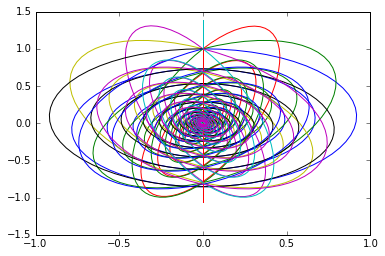

In [354]:
h1=0.01
for i in range(12):
    p = [0,1,cos(i*pi*(1./6.)),sin(i*pi*(1./6.))]
    osc1 = oscilacion(p,800,[1,0.1,0.2],h1)
    #osc2 = oscilacion(p,200,[1,0.1,0],h1)
    plot(osc1[:,0],osc1[:,1])
#plot(osc1[:,0],osc1[:,1],osc2[:,0],osc2[:,1])

Aquí se ven las primeras tres para poder verlas más claramente.

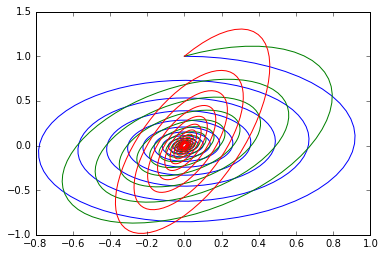

In [355]:
h1=0.01
for i in range(3):
    p = [0,1,cos(i*pi*(1./6.)),sin(i*pi*(1./6.))]
    osc1 = oscilacion(p,800,[1,0.1,0.2],h1)
    #osc2 = oscilacion(p,200,[1,0.1,0],h1)
    plot(osc1[:,0],osc1[:,1])

A continuación se muestra una gráfica de radio contra energía, otra de velocidad contra energía y una de pasos contra energía para la última posición inicial (roja). Se ve que al pasar la velocidad de 1 la energía se pierde más rápidamente.

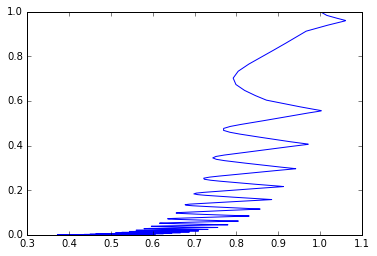

In [359]:
pos1 = (osc1[:,0]**2 + osc1[:,1]**2)**(0.1)
E1 = (0.5)*(osc1[:,2]**2 + osc1[:,3]**2) + 0.5*(osc1[:,0]**2 + osc1[:,1]**2)
#plot(osc1[:,0],(0.5)*(osc1[:,2]**2 + osc1[:,3]**2) + 0.5*(osc1[:,0]**2 + osc1[:,1]**2))
plot(pos1,E1)

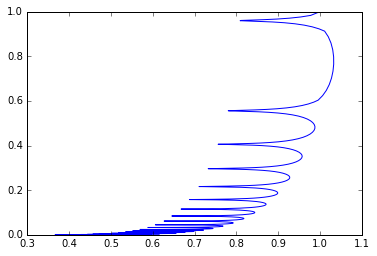

In [360]:
pos1 = (osc1[:,2]**2 + osc1[:,3]**2)**(0.1)
E1 = (0.5)*(osc1[:,2]**2 + osc1[:,3]**2) + 0.5*(osc1[:,0]**2 + osc1[:,1]**2)
#plot(osc1[:,0],(0.5)*(osc1[:,2]**2 + osc1[:,3]**2) + 0.5*(osc1[:,0]**2 + osc1[:,1]**2))
plot(pos1,E1)

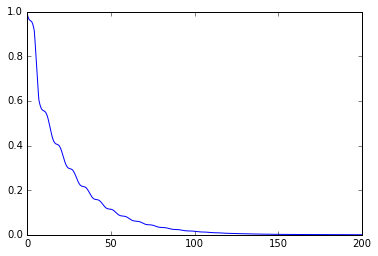

In [357]:
x = linspace(0,200,800)
plot(x,E1)

# c
La siguiente función detiene la integración cuando la energía es menor al 1% de la energía inicial

In [329]:
def oscilacion_E(p,N,k_g_mu,h):
    trayectoria = zeros((N,len(p)))
    trayectoria[0,:] = p
    mi_dt = .1
    
    E = zeros(N)
    E[0] = (0.5)*(p[2]**2 + p[3]**2) + 0.5*(p[0]**2 + p[1]**2)
    
    for i in range(N-1):

        if abs(trayectoria[i,:][1]) < 1:
            t,sol = rk4(ecp1,trayectoria[i,:],[0,mi_dt],k_g_mu,h)
            trayectoria[i+1,:] = sol[-1,:]
            
        else:
            t,sol = rk4(ecp2,trayectoria[i,:],[0,mi_dt],k_g_mu,h)
            trayectoria[i+1,:] = sol[-1,:]
           
        E[i+1] = (0.5)*(trayectoria[i+1,2]**2 + trayectoria[i+1,3]**2) + 0.5*(trayectoria[i+1,0]**2 + trayectoria[i+1,1]**2)
        
        if E[i+1]/E[0] < 0.01: 
            break
    
    return trayectoria,E

Vemos que efectivamente se para cuando se aproximan al centro. 

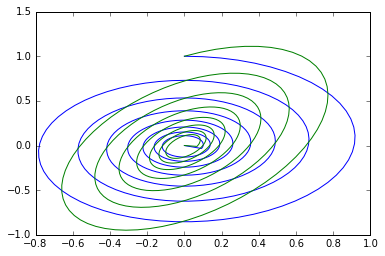

In [97]:
h1=0.01
for i in range(2):
    p = [0,1,cos(i*pi*(1./6.)),sin(i*pi*(1./6.))]
    osc1,E1 = oscilacion_E(p,800,[1,0.1,0.2],h1)
    #osc2 = oscilacion(p,200,[1,0.1,0],h1)
    plot(osc1[:,0],osc1[:,1])

# d
Haciendo el producto cruz entre la posición en cartesianas y el momento en cartesianas so obtiene el momento angular el cual está graficado para las doce condiciones iniciales a continuación. en el eje x se encuentra el radio y en el y el momento angular. Vemos que tiene cierta simetría y que además los que tienen más momento angular varían menos. También se encuentran las líneas rectas que aquí son rectas con momento cero. 

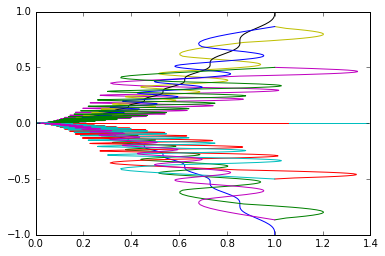

In [362]:
h1=0.01
for i in range(12):
    p = [0,1,cos(i*pi*(1./6.)),sin(i*pi*(1./6.))]
    osc1 = oscilacion(p,800,[1,0.1,0.2],h1)

    P = (osc1[:,0]*osc1[:,3] - osc1[:,1]*osc1[:,2])
    pos1 = (osc1[:,0]**2 + osc1[:,1]**2)**(0.5)

    plot(pos1,P)

Lo siguiente muestra el momento angular en relación al número de pasos. 

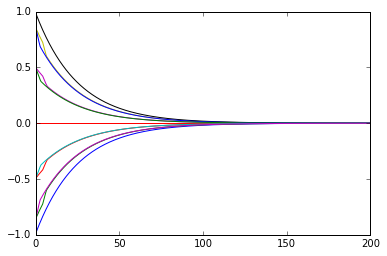

In [363]:
h1=0.01
x = linspace(0,200,800)
for i in range(12):
    p = [0,1,cos(i*pi*(1./6.)),sin(i*pi*(1./6.))]
    osc1 = oscilacion(p,800,[1,0.1,0.2],h1)

    P = (osc1[:,0]*osc1[:,3] - osc1[:,1]*osc1[:,2])
   
    plot(x,P)

# e
A continuación se muestra el esacio fase $x$, $p_x$.

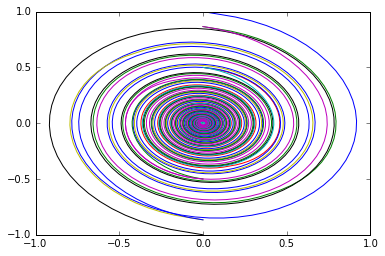

In [365]:
h1=0.01
for i in range(12):
    p = [0,1,cos(i*pi*(1./6.)),sin(i*pi*(1./6.))]
    osc1 = oscilacion(p,800,[1,0.1,0.2],h1)

   
    plot(osc1[:,0],osc1[:,2])

Y el espacio $\rho$, $p_{\rho}$

Sabemos que 

$$
p_{\rho} = \frac {p_x x + p_y y}{\sqrt{x^2+y^2}}
$$

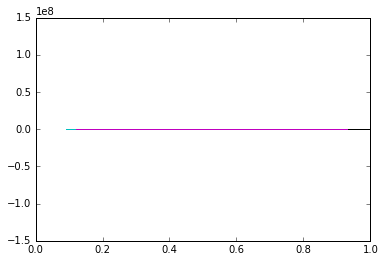

In [366]:
h1=0.01
for i in range(12):
    p = [0,1,cos(i*pi*(1./6.)),sin(i*pi*(1./6.))]
    osc1 = oscilacion(p,800,[1,0.1,0.2],h1)
    
    ro = sqrt(osc1[:,0]**2 + osc1[:,2]**2)**(0.5)
    pro = (osc1[:,0]*osc1[:,2] + osc1[:,1]*osc1[:,3])/ro
   
    plot(ro,pro)

# 2

A la ecuación de movimiento oscilador_c anterior se le añadió una fuerza radial positiva proveniente de la carga puesta en el centro donde se toma todo el término $\frac{q^2}{4 \pi e_0 r^2}$ como la entrada 0 de k_g_mu_q. 

In [313]:
def oscilador_cq(r_v,t,fric,k_g_mu_q):
    r3 = (r_v[0]**2 + r_v[1]**2)**(1.5)
    dx = r_v[2]
    dy = r_v[3]
    
    if fric==0:
        dvx = -k_g_mu_q[0]*r_v[0] + q*r_v[0]/r3
        dvy = -k_g_mu_q[0]*r_v[1] + q*r_v[1]/r3
        
    else:
        dvx = -k_g_mu_q[0]*r_v[0] + fric(r_v[2],r_v[3],k_g_mu_q)[0] + k_g_mu_q[3]*r_v[0]/r3
        dvy = -k_g_mu_q[0]*r_v[1] + fric(r_v[2],r_v[3],k_g_mu_q)[1] + k_g_mu_q[3]*r_v[1]/r3
        
    return array([dx,dy,dvx,dvy])

In [331]:
def ecp1q(r_v,t,k_g_mu_q):
    return oscilador_cq(r_v,t,fric1_c,k_g_mu_q)

def ecp2q(r_v,t,k_g_mu_q):
    return oscilador_cq(r_v,t,fric2_c,k_g_mu_q)

In [332]:
def fric1_c(vx,vy,k_g_mu):
    return array([-k_g_mu[1]*vx,-k_g_mu[1]*vy])

def fric2_c(vx,vy,k_g_mu):
    v = (vx**2 + vy**2)**(0.5)
    f1 = -k_g_mu[2]*v*vx
    f2 = -k_g_mu[2]*v*vy
    return array([f1,f2])
    

In [333]:
def oscilacion_cq(p,N,k_g_mu_q,h):
    trayectoria = zeros((N,len(p)))
    trayectoria[0,:] = p
    mi_dt = .1
    
    E = zeros(N)
    E[0] = (0.5)*(p[2]**2 + p[3]**2) + 0.5*(p[0]**2 + p[1]**2)
    
    for i in range(N-1):

        if abs(trayectoria[i,:][1]) < 1:
            t,sol = rk4(ecp1q,trayectoria[i,:],[0,mi_dt],k_g_mu_q,h)
            trayectoria[i+1,:] = sol[-1,:]
            
        else:
            t,sol = rk4(ecp2q,trayectoria[i,:],[0,mi_dt],k_g_mu_q,h)
            trayectoria[i+1,:] = sol[-1,:]
           
        E[i+1] = (0.5)*(trayectoria[i+1,2]**2 + trayectoria[i+1,3]**2) + 0.5*(trayectoria[i+1,0]**2 + trayectoria[i+1,1]**2)
        
        if E[i+1]/E[0] < 0: 
            break
    
    return trayectoria,E

Vemos de lo siguiente que sí hay órbitas cerradas.

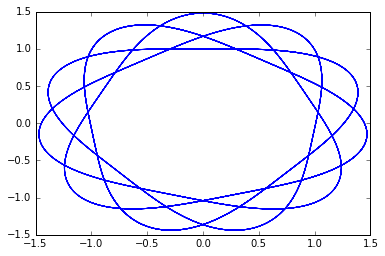

In [347]:
h1=0.01
for i in range(1):
    p = [0,1,cos(i*pi*(1./6.)),sin(i*pi*(1./6.))]
    osc1q,E1q = oscilacion_cq(p,2000,[1,0,0,1],h1)
    #osc2 = oscilacion(p,200,[1,0.1,0],h1)
    plot(osc1q[:,0],osc1q[:,1])

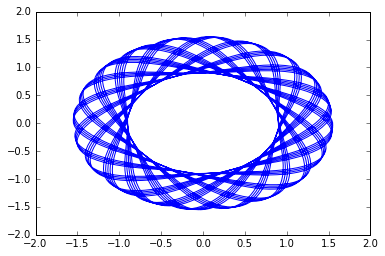

In [350]:
h1=0.01
for i in range(1):
    p = [0,.9,cos(i*pi*(1./6.)),sin(i*pi*(1./6.))]
    osc1q,E1q = oscilacion_cq(p,3000,[1,0,0,1],h1)
    #osc2 = oscilacion(p,200,[1,0.1,0],h1)
    plot(osc1q[:,0],osc1q[:,1])

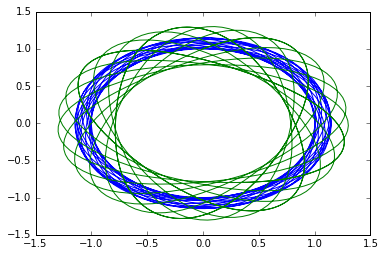

In [345]:
h1=0.01
for i in range(2):
    p = [0,1,cos(i*pi*(1./6.)),sin(i*pi*(1./6.))]
    osc1q,E1q = oscilacion_cq(p,1000,[1,0,0,0.3],h1)
    #osc2 = oscilacion(p,200,[1,0.1,0],h1)
    plot(osc1q[:,0],osc1q[:,1])

Por otro lado, si existe fricción entonces la velocidad angular de la partícula eventualmente disminuirá a cero. Además, la parte radial llegará a un equilibrio donde las fuerzas del resorte y la carga son iguales y decaerá a cero también. A continuación se ven dos condiciones iniciales diferentes donde la partícula se para a un cierto radio. 

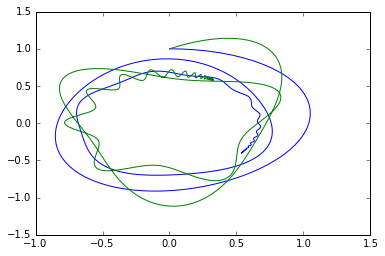

In [182]:
h1=0.01
for i in range(2):
    p = [0,1,cos(i*pi*(1./6.)),sin(i*pi*(1./6.))]
    osc1q,E1q = oscilacion_cq(p,5000,[1,0.1,0.2,0.3],h1)
    #osc2 = oscilacion(p,200,[1,0.1,0],h1)
    plot(osc1q[:,0],osc1q[:,1])

En realidad, la partícula seguiría oscilando, cada vez llegando más abajo del potencial rojo mostrado a continuación, aunque ya muy abajo parece un punto. 

C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()


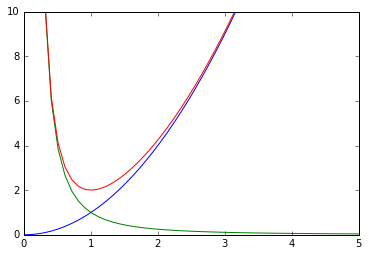

In [210]:
x = linspace(0,5)
y1 = x**2
y2 = x**(-2)
y3 = y1 + y2

plot(x,y1,x,y2,x,y3)
xlim(0,5)
ylim(0,10)
show()

# 3

A continuación se programarán las ecuaciones de movimiento para un sistema con gravedad haia abajo, las fricciones pedidas y la ecuación de rebote.

El rebote se hizo tomando el vector velocidad, rotándolo el ángulo de la pared donde rebotaba, cambiando de signo la componente y y luego rotándolo de regreso. Con esto se obtuvieron las velocidades después del rebote siguientes

$$
V_x = v_x (cos(\theta)^2 - sin(\theta)^2)+2 v_y sin(\theta) cos(\theta)
$$
$$
V_y = v_y (-cos(\theta)^2 + sin(\theta)^2)+2 v_x sin(\theta) cos(\theta)
$$

In [10]:
def e_mov(r_v,t,fric=0,g=9.8,m=1):
    u = sqrt(r_v[2]**2 + r_v[3]**2)
    dx = r_v[2] 
    dy = r_v[3]
    
    if fric==0:
        dvx,dvy = 0, -(g/m)
        
    else:
        dvx = -  fric([r_v[2],r_v[3]])[0] #nuestro modelo de fricción sólo depende de la velocidad 
        dvy = -(g/m) - fric([r_v[2],r_v[3]])[1]

    
    return array([dx,dy,dvx,dvy])


In [11]:
def fric_v(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y])

def fric_v2(v,gamma=0.1):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norm_v*v[0]
    f_y= gamma*norm_v*v[1]
    return array([f_x,f_y])

In [12]:
def rk4_a(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)

    return tiempos,sol

In [172]:
def tiro3(p,N,ang,fric):

    pend = tan(ang)
    alt = 3 + 5*tan(ang)
    trayectoria = zeros((N,len(p)))
    mi_dt = .005
    trayectoria[0,:] = array(p)
    for i in range(N-1):
        t,sol_dt = rk4_a(e_mov,trayectoria[i,:],[0,mi_dt],fric)
        if sol_dt[-1,:][0] < 0:
            
            if (sol_dt[-1,:][1] + pend*sol_dt[-1,:][0]) < 0 and sol_dt[-1,0] > -5 and sol_dt[-1,:][1] < alt:
                dt_busqueda = mi_dt/2
                y_izq = trayectoria[i,:]
                t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric)
                y_med = sol[-1,:]
                while abs(y_izq[1] + pend*y_izq[0]) > 1e-1:
                    if (y_izq[1] + pend*y_izq[0])*(y_med[1] + pend*y_izq[0]) < 0:
                        reinicio = y_izq
                    else:
                        reinicio = y_med
                    dt_busqueda = dt_busqueda/2
                    t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric)
                    y_izq = reinicio
                    y_med = sol[-1,:]
                nvx = y_izq[2]*(cos(-ang)**2 - sin(-ang)**2)+2*y_izq[3]*sin(-ang)*cos(-ang)
                nvy = y_izq[3]*(-cos(-ang)**2 + sin(-ang)**2)+2*y_izq[2]*sin(-ang)*cos(-ang)
                y_izq = array([y_izq[0],y_izq[1],nvx,nvy])
                trayectoria[i+1,:] = y_izq    
            
            elif sol_dt[-1,:][0] + 5 < 0 and sol_dt[-1,:][1] < alt:
                dt_busqueda = mi_dt/2
                y_izq = trayectoria[i,:]
                t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric)
                y_med = sol[-1,:]
                while abs(y_izq[0] + 5) > 1e-2:
                    if (y_izq[0] + 5)*(y_med[0] + 5) < 0:
                        reinicio = y_izq
                    else:
                        reinicio = y_med
                    dt_busqueda = dt_busqueda/2
                    t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric)
                    y_izq = reinicio
                    y_med = sol[-1,:]
                y_izq = array([y_izq[0],y_izq[1],-y_izq[2],y_izq[3]])
                trayectoria[i+1,:] = y_izq 
            
            elif sol_dt[-1,:][1] > alt:
                dt_busqueda = mi_dt/2
                y_izq = trayectoria[i,:]
                t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric)
                y_med = sol[-1,:]
                while abs(y_izq[1] - alt) > 1e-2:
                    if (y_izq[1] - alt)*(y_med[1] - alt) < 0:
                        reinicio = y_izq
                    else:
                        reinicio = y_med
                    dt_busqueda = dt_busqueda/2
                    t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric)
                    y_izq = reinicio
                    y_med = sol[-1,:]
                y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
                trayectoria[i+1,:] = y_izq 
            
            else:
                trayectoria[i+1,:] = sol_dt[-1,:]
        
        else:
            
            if (sol_dt[-1,:][1] - pend*sol_dt[-1,:][0]) < 0 and sol_dt[-1,:][0] < 5 and sol_dt[-1,:][1] < alt:
                #print "buscando punto de rebote"
                dt_busqueda = mi_dt/2
                y_izq = trayectoria[i,:]
                t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric)
                y_med = sol[-1,:]
                while abs(y_izq[1] - pend*y_izq[0]) > 1e-1:
                    if (y_izq[1] - pend*y_izq[0])*(y_med[1] - pend*y_izq[0]) < 0:
                        reinicio = y_izq
                    else:
                        reinicio = y_med
                    dt_busqueda = dt_busqueda/2
                    t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric)
                    y_izq = reinicio
                    y_med = sol[-1,:]
                nvx = y_izq[2]*(cos(ang)**2 - sin(ang)**2)+2*y_izq[3]*sin(ang)*cos(ang)
                nvy = y_izq[3]*(-cos(ang)**2 + sin(ang)**2)+2*y_izq[2]*sin(ang)*cos(ang)
                y_izq = array([y_izq[0],y_izq[1],nvx,nvy])
                trayectoria[i+1,:] = y_izq    
            
            elif sol_dt[-1,:][0] -5 > 0 and sol_dt[-1,:][1] < alt:
                dt_busqueda = mi_dt/2
                y_izq = trayectoria[i,:]
                t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric)
                y_med = sol[-1,:]
                while abs(y_izq[0] - 5) > 1e-2:
                    if (y_izq[0] - 5)*(y_med[0] - 5) < 0:
                        reinicio = y_izq
                    else:
                        reinicio = y_med
                    dt_busqueda = dt_busqueda/2
                    t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric)
                    y_izq = reinicio
                    y_med = sol[-1,:]
                y_izq = array([y_izq[0],y_izq[1],-y_izq[2],y_izq[3]])
                trayectoria[i+1,:] = y_izq 
            
            elif sol_dt[-1,:][1] > alt:
                dt_busqueda = mi_dt/2
                y_izq = trayectoria[i,:]
                t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric)
                y_med = sol[-1,:]
                while abs(y_izq[1] - alt) > 1e-2:
                    if (y_izq[1] - alt)*(y_med[1] - alt) < 0:
                        reinicio = y_izq
                    else:
                        reinicio = y_med
                    dt_busqueda = dt_busqueda/2
                    t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric)
                    y_izq = reinicio
                    y_med = sol[-1,:]
                y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
                trayectoria[i+1,:] = y_izq 
            
            else:
                trayectoria[i+1,:] = sol_dt[-1,:]
        
    return trayectoria

In [72]:
def caja_tiro(N,ang1,ang2,fric,magnitud):
    #ang1 = pi/6
    alt1 = 5*tan(ang1)
    alt2 = 3 + alt1
    rx = -(5./1.5)
    ry = (5./1.5)*tan(ang1)
    vx = magnitud*cos(ang2)
    vy = magnitud*sin(ang2)
    r_v_ini = [rx,ry,vx,vy]

    trayectoria = tiro3(r_v_ini,N,ang1,fric)

    plot(trayectoria[:,0],trayectoria[:,1],'--')
    x = linspace(-8,8)
    alt = 3 + 5*tan(ang1)
    plot(x,-tan(ang1)*x,'green',x,tan(ang1)*x,'green')
    plt.plot((-5, -5), (alt1, alt2), 'green')
    plt.plot((5, 5), (alt1, alt2), 'green')
    plt.plot((-5,5),(alt2,alt2))
    plot(trayectoria[-1,0],trayectoria[-1,1],'o')
    #plt.axis('equal')
    ylim(0,7)
    xlim(-6,6)
    grid(True)

# a

Vemos del primer caso que la magnitud de la velocidad es muy baja, por lo cual es casi como si rodara hacia abajo y ganara velocidad hasta rebotar con el vértice inferior.

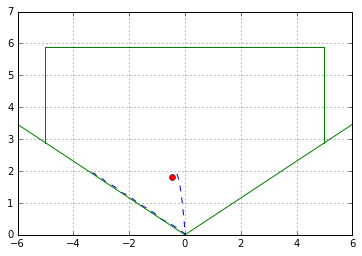

In [301]:
caja_tiro(400,pi*(1./6.),pi*(1./6.),0,1)

Ahora vemos que se pueden ver bastantes más que 20 rebotes y que la pelota se queda encerrada debajo de la posición inicial.

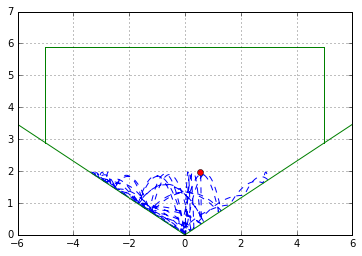

In [302]:
caja_tiro(6000,pi*(1./6.),pi*(2./6.),0,1)

Las siguientes son los casos solicitados.

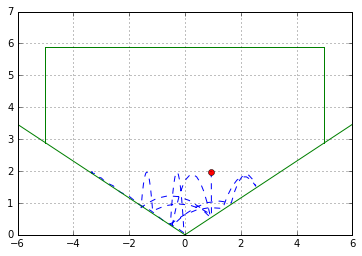

In [94]:
caja_tiro(2000,pi*(1./6.),pi*(3./6.),0,1)

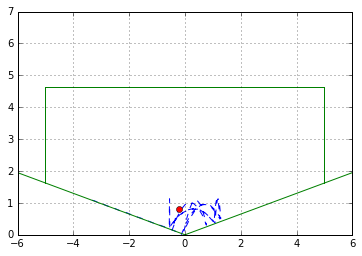

In [95]:
caja_tiro(2000,pi*(1./10.),pi*(1./10.),0,1)

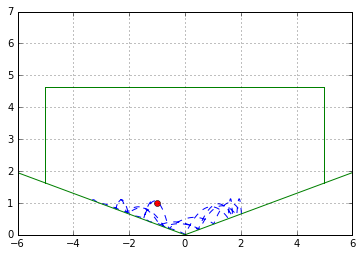

In [305]:
caja_tiro(2000,pi*(1./10.),pi*(2./10.),0,1)

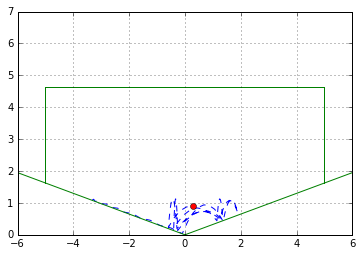

In [99]:
caja_tiro(2000,pi*(1./10.),pi*(3./10.),0,1)

# b

Ahora añadiremos un término de fricción lineal.

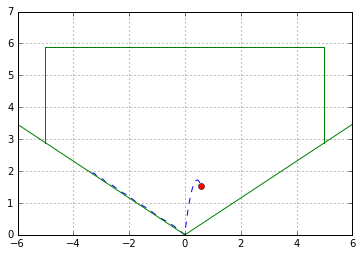

In [309]:
caja_tiro(400,pi*(1./6.),pi*(1./6.),fric_v,1)

Vemos en comparación con la gráfica de la misma condición que la pelota ya no se queda encerrada en el mismo segmento, si no que tiende al vértice inferior.

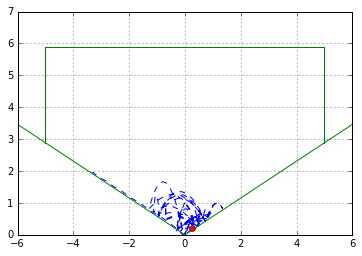

In [131]:
caja_tiro(300,pi*(1./6.),pi*(2./6.),fric_v,1)

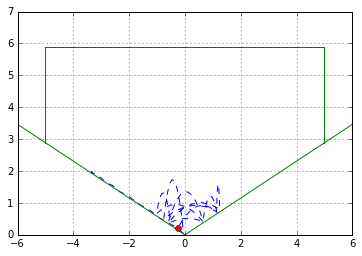

In [102]:
caja_tiro(100,pi*(1./6.),pi*(3./6.),fric_v,1)

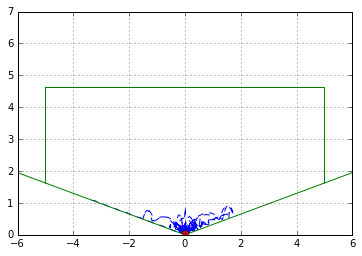

In [139]:
caja_tiro(800,pi*(1./10.),pi*(1./10.),fric_v,1.1)

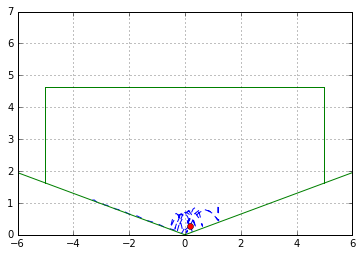

In [140]:
caja_tiro(100,pi*(1./10.),pi*(2./10.),fric_v,1)

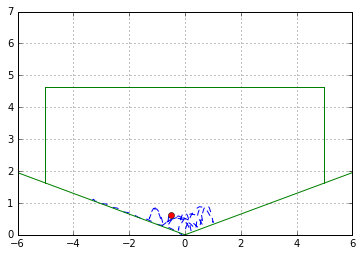

In [141]:
caja_tiro(100,pi*(1./10.),pi*(3./10.),fric_v,1)

# c

Para las gráficas anteriores se había usado dt = 0.1, sin embargo al incrementar la velocidad la pelota avanza más cada paso y se salí de la caja, crasheando el programa. Por esto se redujo el paso a 0.005.

A continuación se presentan gráficas significativas de lo anterior, primero con v = 25 y luego con v = 60. Todas están hechas para la misma cantidad de pasos, primero sin fricción, luego con fricción lineal y luego con proporiconal a $v^{3/2}$. 

Vemos que la densidad de trayectorias decrece como aumenta la densidad. Además todos los modelos con densidad terminan con la pelota en la parte de abajo. Sin embargo, está claro que el segundo modelo de fricción detiene la pelota muchísimo más rápido.

$v = 25$

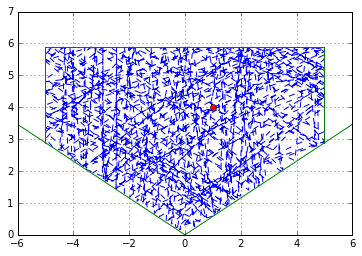

In [187]:
caja_tiro(8000,pi*(1./6.),pi*(1./6.),0,25)

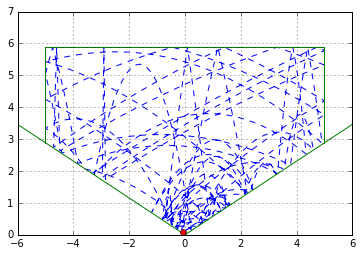

In [185]:
caja_tiro(8000,pi*(1./6.),pi*(1./6.),fric_v,25)

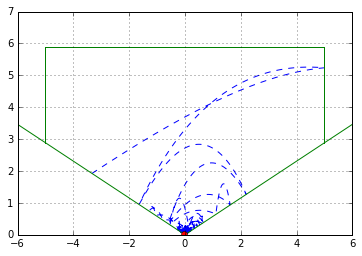

In [186]:
caja_tiro(8000,pi*(1./6.),pi*(1./6.),fric_v2,25)

$v = 25$

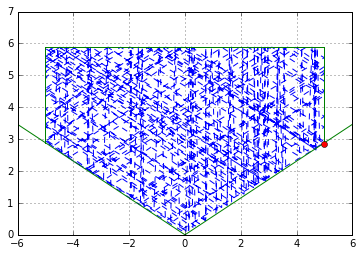

In [310]:
caja_tiro(8000,pi*(1./6.),pi*(1./6.),0,60)

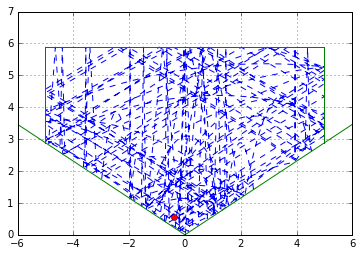

In [189]:
caja_tiro(8000,pi*(1./6.),pi*(1./6.),fric_v,60)

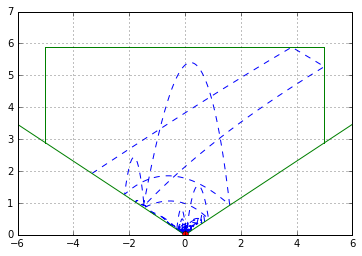

In [190]:
caja_tiro(8000,pi*(1./6.),pi*(1./6.),fric_v2,60)

# d

Primero haremos dos funciones que nos darán el espacio fase x, px y y, py respectivamente.

In [221]:
def caja_tiro_fasex(N,ang1,ang2,fric,magnitud):
    #ang1 = pi/6
    alt1 = 5*tan(ang1)
    alt2 = 3 + alt1
    rx = -(5./1.5)
    ry = (5./1.5)*tan(ang1)
    vx = magnitud*cos(ang2)
    vy = magnitud*sin(ang2)
    r_v_ini = [rx,ry,vx,vy]

    trayectoria = tiro3(r_v_ini,N,ang1,fric)
    plot(trayectoria[:,0],trayectoria[:,2],'.')
    plot(trayectoria[:,0],trayectoria[:,2])

In [222]:
def caja_tiro_fasey(N,ang1,ang2,fric,magnitud):
    #ang1 = pi/6
    alt1 = 5*tan(ang1)
    alt2 = 3 + alt1
    rx = -(5./1.5)
    ry = (5./1.5)*tan(ang1)
    vx = magnitud*cos(ang2)
    vy = magnitud*sin(ang2)
    r_v_ini = [rx,ry,vx,vy]

    trayectoria = tiro3(r_v_ini,N,ang1,fric)
    plot(trayectoria[:,1],trayectoria[:,3],'.')
    plot(trayectoria[:,1],trayectoria[:,3])

Si la pelota es lanzada con un ángulo alpha con velocidad 5 etonces

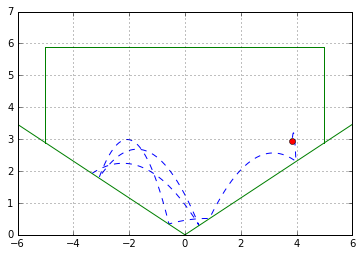

In [215]:
caja_tiro(1000,pi*(1./6.),pi*(1./6.),0,5)

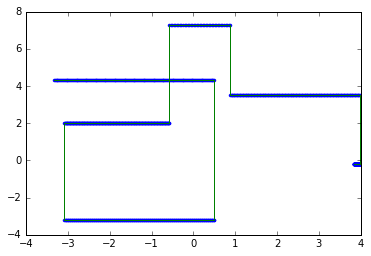

In [220]:
caja_tiro_fasex(1000,pi*(1./6.),pi*(1./6.),0,5)

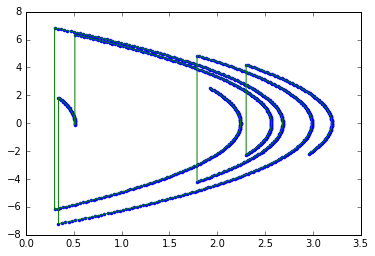

In [223]:
caja_tiro_fasey(1000,pi*(1./6.),pi*(1./6.),0,5)

Por la discontinuidad que causan los rebotes se añadió la línea verde que conecta los puntos del espacio fase. Vemos que, como esperábamos, el espacio fase en x son rectas, ya que se conserva la velocidad en x al moverse. Por otro lado, el espacio fase de y son parábolas a causa de la gravedad.

Si la pelota es lanzada verticalmente hacia arriba las gráficas son bastante similares.

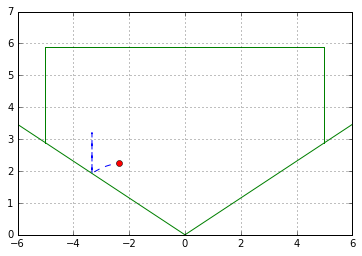

In [238]:
caja_tiro(250,pi*(1./6.),pi*(0.5),0,5)

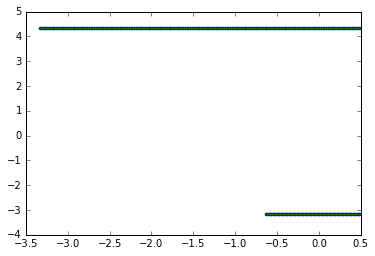

In [239]:
caja_tiro_fasex(250,pi*(1./6.),pi*(1./6.),0,5)

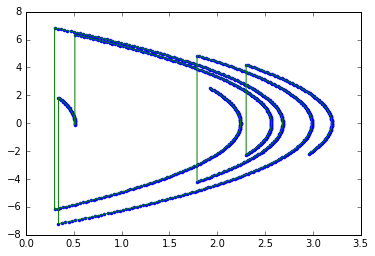

In [246]:
caja_tiro_fasey(1000,pi*(1./6.),pi*(1./6.),0,5)

Si agregamos fricción entonces

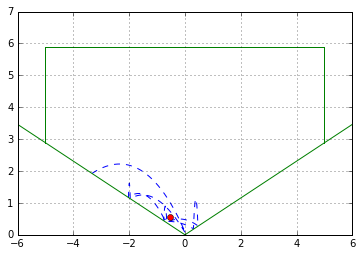

In [247]:
caja_tiro(1000,pi*(1./6.),pi*(1./6.),fric_v2,5)

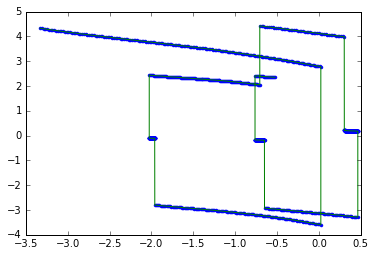

In [248]:
caja_tiro_fasex(1000,pi*(1./6.),pi*(1./6.),fric_v2,5)

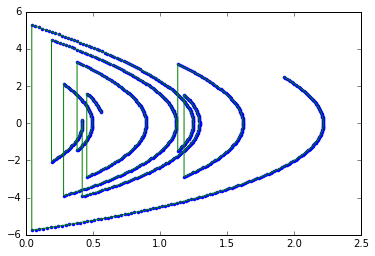

In [249]:
caja_tiro_fasey(1000,pi*(1./6.),pi*(1./6.),fric_v2,5)

En el espacio de y se ve bastante similar, sin embargo vemos en el espacio de x que, como esperábamos, las líneas dejaron de ser rectas.

# 4

A continuación programaremos una ecuación de movimiento sin gravedad, e_mov_dona y una función para el rebote de una pelota dentro de una caja como la del dibujo abajo. El bote se programó como en los ejercicios anteriores,considerando que al botar con un círculo es como si la pelota botase contra un plano tangente al círculo.

In [251]:
def e_mov_dona(r_v,t,fric=0,g=9.8,m=1):
    u = sqrt(r_v[2]**2 + r_v[3]**2)
    dx = r_v[2] 
    dy = r_v[3]
    
    dvx,dvy = 0, 0

    return array([dx,dy,dvx,dvy])


In [252]:
def tiro2(p,N,fric):

    trayectoria = zeros((N,len(p)))
    mi_dt = .1
    trayectoria[0,:] = array(p)
    for i in range(N-1):
        t,sol_dt = rk4_a(e_mov_dona,trayectoria[i,:],[0,mi_dt],fric)
        if (sol_dt[-1,1]**2 + sol_dt[-1,0]**2) < 4:
            #print "buscando punto de rebote"
            dt_busqueda = mi_dt/2
            y_izq = trayectoria[i,:]
            t,sol = rk4_a(e_mov_dona,trayectoria[i,:],[0,dt_busqueda],fric)
            y_med = sol[-1,:]
            while abs(y_izq[0]**2 + y_izq[1]**2 - 4) > 1e-1:
                if (y_izq[0]**2 + y_izq[1]**2 - 4)*(y_med[0]**2 + y_med[1]**2 - 4) < 0:
                    reinicio = y_izq
                else:
                    reinicio = y_med
                dt_busqueda = dt_busqueda/2
                t,sol = rk4_a(e_mov_dona,reinicio,[0,dt_busqueda],fric)
                y_izq = reinicio
                y_med = sol[-1,:]
            ang = -arctan(y_izq[0]/y_izq[1])
            y_izq = array([y_izq[0],y_izq[1],(y_izq[2]*(cos(ang)**2 - sin(ang)**2)+2*y_izq[3]*sin(ang)*cos(ang)),(y_izq[3]*(-cos(ang)**2 + sin(ang)**2)+2*y_izq[2]*sin(ang)*cos(ang))])
            trayectoria[i+1,:] = y_izq    
       
        elif (sol_dt[-1,1]**2 + sol_dt[-1,0]**2) > 16:
            dt_busqueda = mi_dt/2
            y_izq = trayectoria[i,:]
            t,sol = rk4_a(e_mov_dona,trayectoria[i,:],[0,dt_busqueda],fric)
            y_med = sol[-1,:]
            while abs(y_izq[0]**2 + y_izq[1]**2 - 16) > 1e-3:
                if (y_izq[0]**2 + y_izq[1]**2 - 16)*(y_med[0]**2 + y_med[1]**2 - 16) < 0:
                    reinicio = y_izq
                else:
                    reinicio = y_med
                dt_busqueda = dt_busqueda/2
                t,sol = rk4_a(e_mov_dona,reinicio,[0,dt_busqueda],fric)
                y_izq = reinicio
                y_med = sol[-1,:]
            ang1 = -arctan(y_izq[0]/y_izq[1])
            y_izq = array([y_izq[0],y_izq[1],(y_izq[2]*(cos(ang1)**2 - sin(ang1)**2)+2*y_izq[3]*sin(ang1)*cos(ang1)),(y_izq[3]*(-cos(ang1)**2 + sin(ang1)**2)+2*y_izq[2]*sin(ang1)*cos(ang1))])
            trayectoria[i+1,:] = y_izq
        
        else:
            trayectoria[i+1,:] = sol_dt[-1,:]

    return trayectoria

# a
A continuación se muestran dos trayectorias iguales, una con más puntos que la anterior, de una pelota dentro de la caja dónica.

C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in sqrt


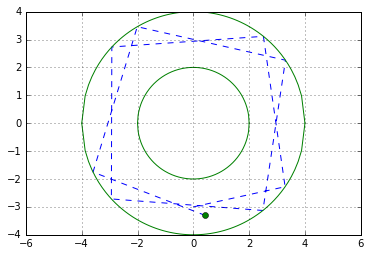

In [99]:
x = linspace(-4,8,100)
p_ini = [0,-3,0.5,.11]

trayectoria = tiro2(p_ini,900,0)

plot(trayectoria[:,0],trayectoria[:,1],'--')
plot(trayectoria[-1,0],trayectoria[-1,1],'o')

plot(x, sqrt(16 - x**2),'green')
plot(x, -sqrt(16 - x**2),'green')
y = linspace(-2,2,200)
plot(y, sqrt(4 - y**2),'green')
plot(y, -sqrt(4 - y**2),'green')
plt.axis('equal')
grid(True)

C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in sqrt


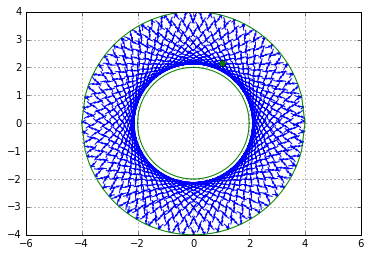

In [104]:
x = linspace(-4,8,100)
p_ini = [0,-3,1,1]

trayectoria = tiro2(p_ini,9000,fric_v)

plot(trayectoria[:,0],trayectoria[:,1],'--')
plot(trayectoria[-1,0],trayectoria[-1,1],'o')

plot(x, sqrt(16 - x**2),'green')
plot(x, -sqrt(16 - x**2),'green')
y = linspace(-2,2,200)
plot(y, sqrt(4 - y**2),'green')
plot(y, -sqrt(4 - y**2),'green')
plt.axis('equal')
grid(True)

# b
Sí existen condiciones iniciales donde se queda encerrada en un sector. A continuación se muestran algunas

C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in sqrt


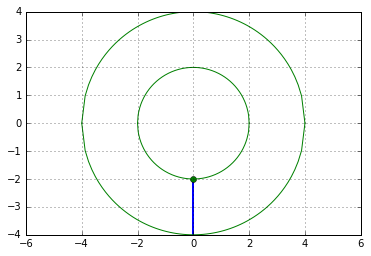

In [253]:
x = linspace(-4,8,100)
p_ini = [0,-3,0,1]

trayectoria = tiro2(p_ini,9000,fric_v)

plot(trayectoria[:,0],trayectoria[:,1],'--')
plot(trayectoria[-1,0],trayectoria[-1,1],'o')

plot(x, sqrt(16 - x**2),'green')
plot(x, -sqrt(16 - x**2),'green')
y = linspace(-2,2,200)
plot(y, sqrt(4 - y**2),'green')
plot(y, -sqrt(4 - y**2),'green')
plt.axis('equal')
grid(True)

C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in sqrt


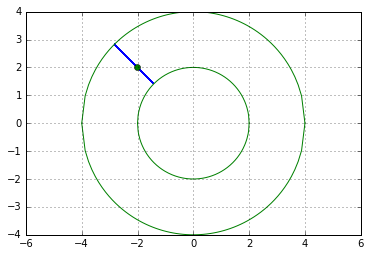

In [257]:
x = linspace(-4,8,100)
p_ini = [-2,2,1,-1]

trayectoria = tiro2(p_ini,900,fric_v)

plot(trayectoria[:,0],trayectoria[:,1],'--')
plot(trayectoria[-1,0],trayectoria[-1,1],'o')

plot(x, sqrt(16 - x**2),'green')
plot(x, -sqrt(16 - x**2),'green')
y = linspace(-2,2,200)
plot(y, sqrt(4 - y**2),'green')
plot(y, -sqrt(4 - y**2),'green')
plt.axis('equal')
grid(True)

C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in sqrt


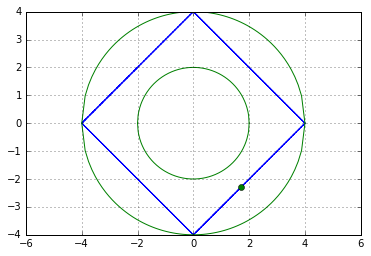

In [260]:
x = linspace(-4,8,100)
p_ini = [-2,2,-1,-1]

trayectoria = tiro2(p_ini,900,fric_v)

plot(trayectoria[:,0],trayectoria[:,1],'--')
plot(trayectoria[-1,0],trayectoria[-1,1],'o')

plot(x, sqrt(16 - x**2),'green')
plot(x, -sqrt(16 - x**2),'green')
y = linspace(-2,2,200)
plot(y, sqrt(4 - y**2),'green')
plot(y, -sqrt(4 - y**2),'green')
plt.axis('equal')
grid(True)

Sin embargo, estas son muy frágiles, ya que si se altera un poco la condición inicial se ve que la pelota empezará a recorrer más partes de la caja dónica.

C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in sqrt


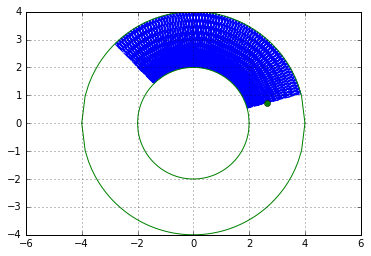

In [259]:
x = linspace(-4,8,100)
p_ini = [-2,2,1.01,-1]

trayectoria = tiro2(p_ini,9000,fric_v)

plot(trayectoria[:,0],trayectoria[:,1],'--')
plot(trayectoria[-1,0],trayectoria[-1,1],'o')

plot(x, sqrt(16 - x**2),'green')
plot(x, -sqrt(16 - x**2),'green')
y = linspace(-2,2,200)
plot(y, sqrt(4 - y**2),'green')
plot(y, -sqrt(4 - y**2),'green')
plt.axis('equal')
grid(True)

La solución del cuadrado es un poco menso frágil, sin embargo también recorrerá más partes de la caja, como se ve de las siguientes gráficas. Sin embargo, queda un segmento dónico donde no pasa.

C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in sqrt


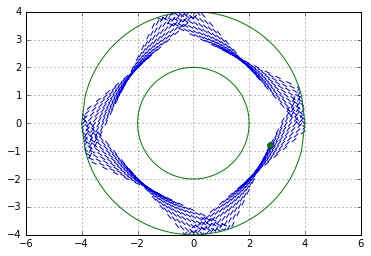

In [269]:
x = linspace(-4,8,100)
p_ini = [-2,2,-1.2,-1]

trayectoria = tiro2(p_ini,2000,fric_v)

plot(trayectoria[:,0],trayectoria[:,1],'--')
plot(trayectoria[-1,0],trayectoria[-1,1],'o')

plot(x, sqrt(16 - x**2),'green')
plot(x, -sqrt(16 - x**2),'green')
y = linspace(-2,2,200)
plot(y, sqrt(4 - y**2),'green')
plot(y, -sqrt(4 - y**2),'green')
plt.axis('equal')
grid(True)

C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in sqrt


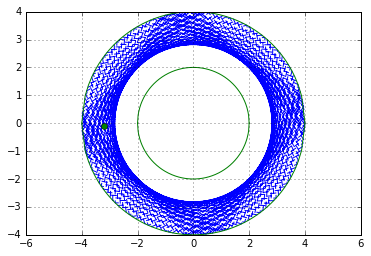

In [271]:
x = linspace(-4,8,100)
p_ini = [-2,2,-1.2,-1]

trayectoria = tiro2(p_ini,9000,fric_v)

plot(trayectoria[:,0],trayectoria[:,1],'--')
plot(trayectoria[-1,0],trayectoria[-1,1],'o')

plot(x, sqrt(16 - x**2),'green')
plot(x, -sqrt(16 - x**2),'green')
y = linspace(-2,2,200)
plot(y, sqrt(4 - y**2),'green')
plot(y, -sqrt(4 - y**2),'green')
plt.axis('equal')
grid(True)

# c

Arreglaremos e_mov_dona para que tome en cuenta una gravedad en dirección $\vec u = \hat i + \hat j$. 

In [273]:
def e_mov_dona_g(r_v,t,fric=0,g=9.8,m=1):
    u = sqrt(r_v[2]**2 + r_v[3]**2)
    dx = r_v[2] 
    dy = r_v[3]
    
    dvx,dvy = 5, 5

    return array([dx,dy,dvx,dvy])


In [274]:
def tiro2_g(p,N,fric):

    trayectoria = zeros((N,len(p)))
    mi_dt = .1
    trayectoria[0,:] = array(p)
    for i in range(N-1):
        t,sol_dt = rk4_a(e_mov_dona_g,trayectoria[i,:],[0,mi_dt],fric)
        if (sol_dt[-1,1]**2 + sol_dt[-1,0]**2) < 4:
            #print "buscando punto de rebote"
            dt_busqueda = mi_dt/2
            y_izq = trayectoria[i,:]
            t,sol = rk4_a(e_mov_dona_g,trayectoria[i,:],[0,dt_busqueda],fric)
            y_med = sol[-1,:]
            while abs(y_izq[0]**2 + y_izq[1]**2 - 4) > 1e-1:
                if (y_izq[0]**2 + y_izq[1]**2 - 4)*(y_med[0]**2 + y_med[1]**2 - 4) < 0:
                    reinicio = y_izq
                else:
                    reinicio = y_med
                dt_busqueda = dt_busqueda/2
                t,sol = rk4_a(e_mov_dona_g,reinicio,[0,dt_busqueda],fric)
                y_izq = reinicio
                y_med = sol[-1,:]
            ang = -arctan(y_izq[0]/y_izq[1])
            y_izq = array([y_izq[0],y_izq[1],(y_izq[2]*(cos(ang)**2 - sin(ang)**2)+2*y_izq[3]*sin(ang)*cos(ang)),(y_izq[3]*(-cos(ang)**2 + sin(ang)**2)+2*y_izq[2]*sin(ang)*cos(ang))])
            trayectoria[i+1,:] = y_izq    
       
        elif (sol_dt[-1,1]**2 + sol_dt[-1,0]**2) > 16:
            dt_busqueda = mi_dt/2
            y_izq = trayectoria[i,:]
            t,sol = rk4_a(e_mov_dona_g,trayectoria[i,:],[0,dt_busqueda],fric)
            y_med = sol[-1,:]
            while abs(y_izq[0]**2 + y_izq[1]**2 - 16) > 1e-3:
                if (y_izq[0]**2 + y_izq[1]**2 - 16)*(y_med[0]**2 + y_med[1]**2 - 16) < 0:
                    reinicio = y_izq
                else:
                    reinicio = y_med
                dt_busqueda = dt_busqueda/2
                t,sol = rk4_a(e_mov_dona_g,reinicio,[0,dt_busqueda],fric)
                y_izq = reinicio
                y_med = sol[-1,:]
            ang1 = -arctan(y_izq[0]/y_izq[1])
            y_izq = array([y_izq[0],y_izq[1],(y_izq[2]*(cos(ang1)**2 - sin(ang1)**2)+2*y_izq[3]*sin(ang1)*cos(ang1)),(y_izq[3]*(-cos(ang1)**2 + sin(ang1)**2)+2*y_izq[2]*sin(ang1)*cos(ang1))])
            trayectoria[i+1,:] = y_izq
        
        else:
            trayectoria[i+1,:] = sol_dt[-1,:]

    return trayectoria

C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in sqrt


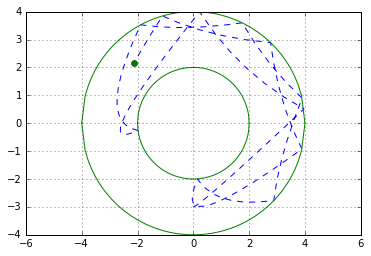

In [278]:
x = linspace(-4,8,100)
p_ini = [0,-3,0.5,.11]

trayectoria = tiro2_g(p_ini,100,0)

plot(trayectoria[:,0],trayectoria[:,1],'--')
plot(trayectoria[-1,0],trayectoria[-1,1],'o')

plot(x, sqrt(16 - x**2),'green')
plot(x, -sqrt(16 - x**2),'green')
y = linspace(-2,2,200)
plot(y, sqrt(4 - y**2),'green')
plot(y, -sqrt(4 - y**2),'green')
plt.axis('equal')
grid(True)

Si queremos que la pelota se quede en la mitad de la caja debemos hacer que la pelota tenga la misma energía o menos en las condiciones iniciales que la energía potencial sobre la recta punteada a continuación. La tangente sería el "suelo" perpendicular a la gravedad.

C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


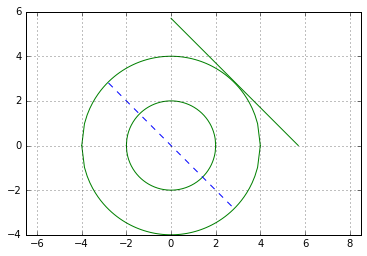

In [298]:
plot(x, sqrt(16 - x**2),'green')
plot(x, -sqrt(16 - x**2),'green')
y = linspace(-2,2,200)
plot(y, sqrt(4 - y**2),'green')
plot(y, -sqrt(4 - y**2),'green')
plt.plot((0, 5.7), (5.7, 0), 'green')
a = 5.7
b = 2.8
plt.plot((-b, b), (b, -b),'--')
plt.axis('equal')
grid(True)

Vemos que la energía sobre la línea punteada es $E = mgh$ donde h es la distancia del punto al piso. A continuación se muestra una donde condición inicial donde la pelota se queda a la mitad de la caja.

C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Javier\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in sqrt


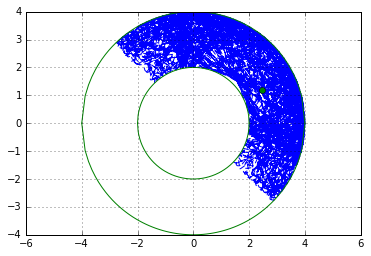

In [300]:
x = linspace(-4,8,100)
p_ini = [2,-2,0,0]

trayectoria = tiro2_g(p_ini,5000,0)

plot(trayectoria[:,0],trayectoria[:,1],'--')
plot(trayectoria[-1,0],trayectoria[-1,1],'o')

plot(x, sqrt(16 - x**2),'green')
plot(x, -sqrt(16 - x**2),'green')
y = linspace(-2,2,200)
plot(y, sqrt(4 - y**2),'green')
plot(y, -sqrt(4 - y**2),'green')
plt.axis('equal')
grid(True)